In [1]:
## Import the necessary modules
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2, RFE, f_classif
from sklearn.preprocessing import StandardScaler, LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import precision_recall_curve, f1_score, precision_score, recall_score
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
import joblib

In [2]:
df = pd.read_excel("D:\Datamites CDS1 Project\Employee-Performance-Analysis\dataset\INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls")

In [3]:
df.head(2)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3


In [4]:
## As there are no missing values so we skip this step

In [5]:
# Preprocessing: encode categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns
label_encoders = {}

for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

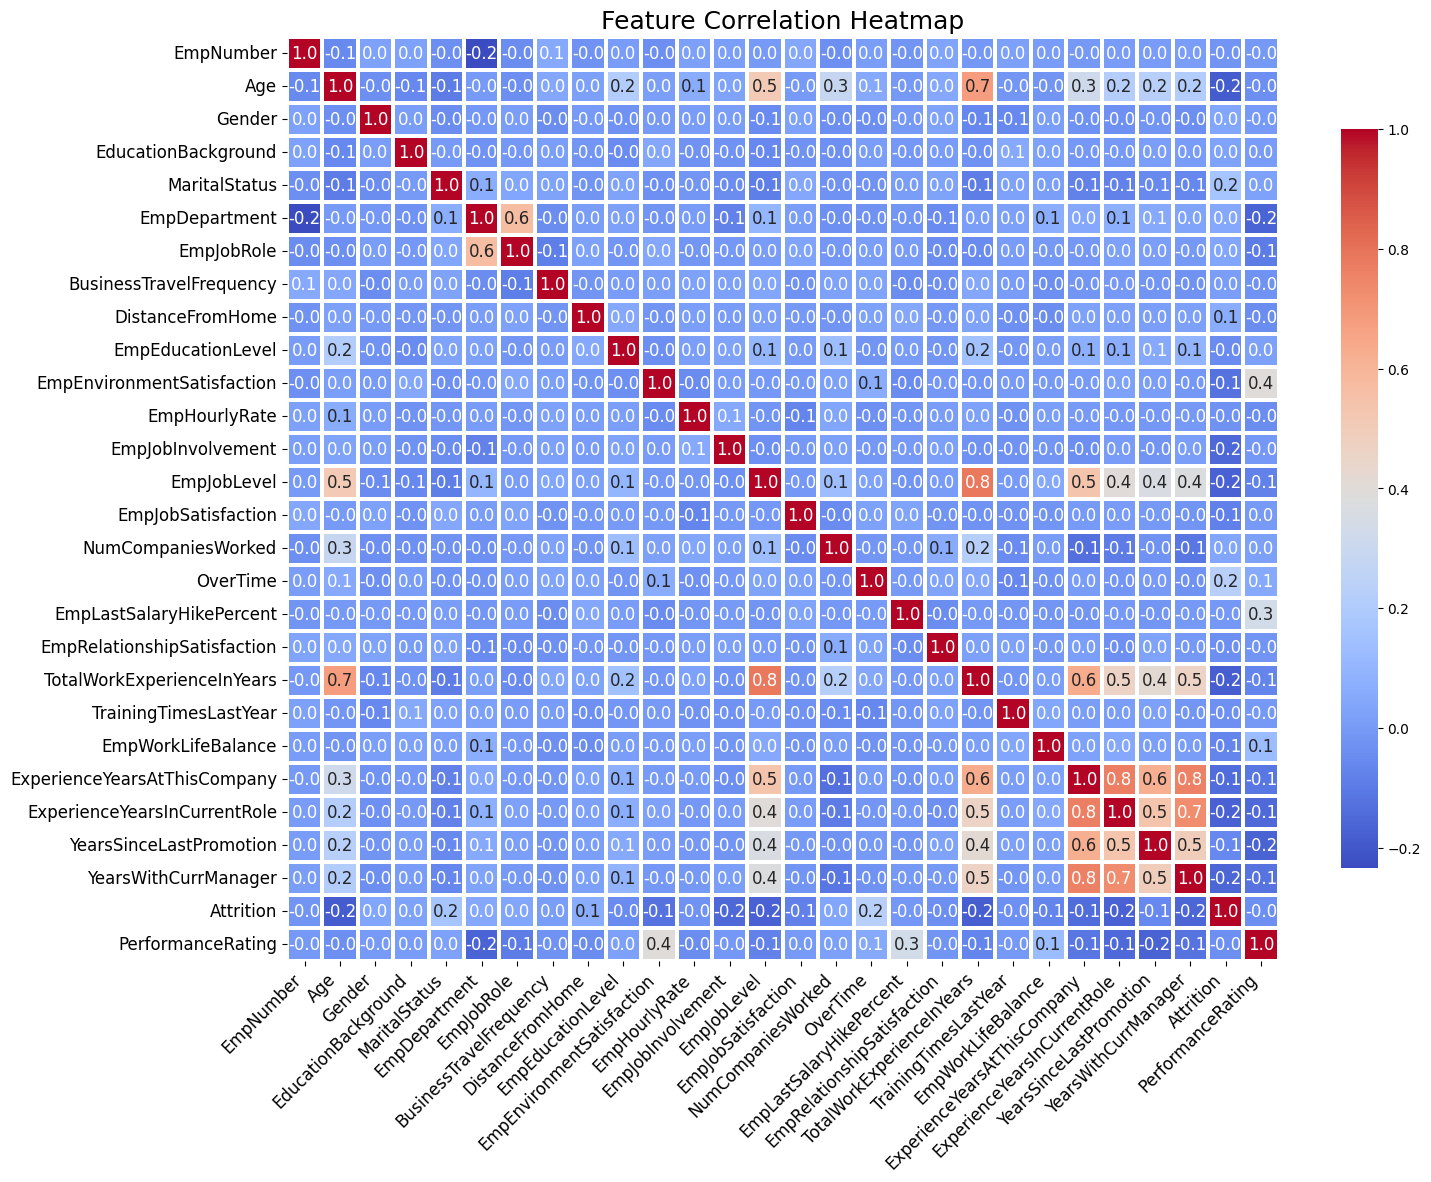

In [6]:
# Visualizing the Correlation Matrix
correlation_matrix = pd.DataFrame(df, columns=df.columns).corr()
plt.figure(figsize=(16, 12))  # Increase the size of the heatmap further
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt='.1f',  # Reduce the decimal places to 1 for clarity
            cmap='coolwarm',  # Use the 'coolwarm' palette for better contrast
            linewidths=1.5,  # Increase line width for better separation
            linecolor='white',  # Use white lines for more contrast
            annot_kws={"size": 12},  # Increase the size of annotations
            cbar_kws={"shrink": 0.8})  # Adjust the color bar size
plt.title('Feature Correlation Heatmap', fontsize=18)
plt.xticks(fontsize=12, rotation=45, ha='right')  # Rotate x labels for better readability
plt.yticks(fontsize=12)
plt.show()

In [7]:

# Explanation: This heatmap shows the correlation between different features.
# A correlation close to 1 or -1 indicates a strong linear relationship, while a correlation close to 0 indicates a weak relationship.
# Highly correlated features can sometimes be redundant, so this analysis helps in understanding the relationships between features.

In [8]:
# 2. Calculate Variance Inflation Factor (VIF)
# Adding a constant column to the dataframe for the VIF calculation
X = add_constant(df)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Remove the constant column for clarity
vif_data = vif_data[vif_data['Feature'] != 'const']

print("Variance Inflation Factor (VIF) for each feature:")
print(vif_data)

# Analyze VIF results
high_vif_features = vif_data[vif_data["VIF"] > 5]
if not high_vif_features.empty:
    print("\nFeatures with high VIF (potential multicollinearity):")
    print(high_vif_features)
else:
    print("\nNo multicollinearity detected based on VIF values.")

Variance Inflation Factor (VIF) for each feature:
                         Feature       VIF
1                      EmpNumber  1.098020
2                            Age  2.085368
3                         Gender  1.020300
4            EducationBackground  1.019349
5                  MaritalStatus  1.060695
6                  EmpDepartment  1.696262
7                     EmpJobRole  1.543236
8        BusinessTravelFrequency  1.029675
9               DistanceFromHome  1.020432
10             EmpEducationLevel  1.072940
11    EmpEnvironmentSatisfaction  1.324885
12                 EmpHourlyRate  1.025308
13             EmpJobInvolvement  1.049239
14                   EmpJobLevel  2.735132
15            EmpJobSatisfaction  1.032885
16            NumCompaniesWorked  1.277070
17                      OverTime  1.102694
18      EmpLastSalaryHikePercent  1.209921
19   EmpRelationshipSatisfaction  1.029477
20    TotalWorkExperienceInYears  4.777960
21         TrainingTimesLastYear  1.022782
22  

In [9]:
# we can skip EmpNumber as it is not that important.
# Remove the first column
df = df.iloc[:, 1:]

In [10]:
df.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,2,2,5,13,2,10,3,4,...,4,10,2,2,10,7,0,8,0,3
1,47,1,2,2,5,13,2,14,4,4,...,4,20,2,3,7,7,1,7,0,3
2,40,1,1,1,5,13,1,5,4,4,...,3,20,2,3,18,13,1,12,0,4
3,41,1,0,0,3,8,2,10,4,2,...,2,23,2,2,21,6,12,6,0,3
4,60,1,2,2,5,13,2,16,4,1,...,4,10,1,3,2,2,2,2,0,3


In [11]:
# Split the dataset into features and target variable
X = df.drop('PerformanceRating', axis=1)
y = df['PerformanceRating']

In [12]:
X.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,32,1,2,2,5,13,2,10,3,4,...,12,4,10,2,2,10,7,0,8,0
1,47,1,2,2,5,13,2,14,4,4,...,12,4,20,2,3,7,7,1,7,0
2,40,1,1,1,5,13,1,5,4,4,...,21,3,20,2,3,18,13,1,12,0
3,41,1,0,0,3,8,2,10,4,2,...,15,2,23,2,2,21,6,12,6,0
4,60,1,2,2,5,13,2,16,4,1,...,14,4,10,1,3,2,2,2,2,0


In [13]:
y.head()

0    3
1    3
2    4
3    3
4    3
Name: PerformanceRating, dtype: int64

In [14]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
# 1. Apply PCA to find the optimal number of components
pca = PCA().fit(X_scaled)

In [16]:
# Calculate the cumulative variance explained by each component
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

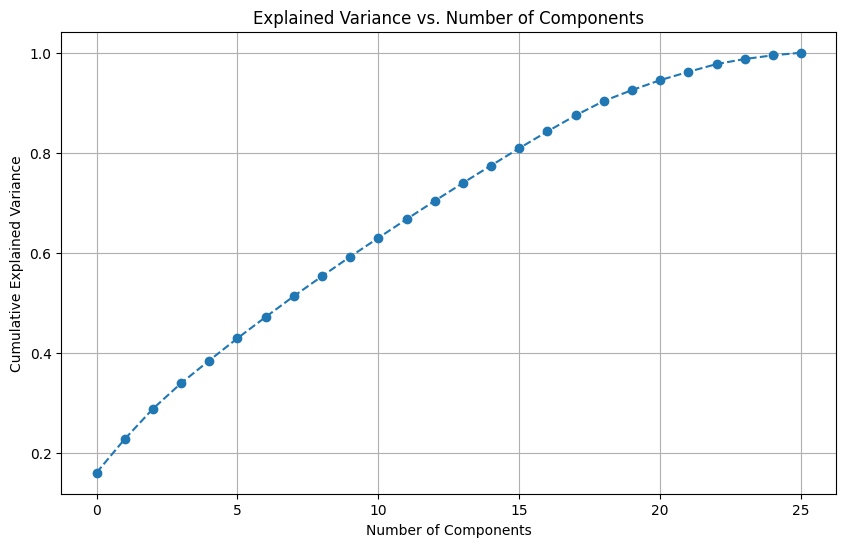

In [17]:
# Plot cumulative explained variance to determine the optimal number of components
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

In [18]:
# Select the number of components that explain at least 95% of the variance
optimal_n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Optimal number of PCA components selected: {optimal_n_components}")

Optimal number of PCA components selected: 22


In [19]:
# Apply PCA with the selected number of components
pca = PCA(n_components=optimal_n_components)
X_pca = pca.fit_transform(X_scaled)
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by Selected PCA Components: {explained_variance}")

Explained Variance by Selected PCA Components: [0.16010534 0.06721404 0.06049885 0.05122267 0.04545002 0.04441749
 0.04250229 0.04165825 0.03990265 0.0391271  0.03756032 0.03732841
 0.0366216  0.03582486 0.0350149  0.03448768 0.03364982 0.03200026
 0.02892483 0.02172681 0.01988681 0.01663761]


In [20]:
# Combine PCA components with original features
pca_columns = [f'PCA_{i+1}' for i in range(optimal_n_components)]
X_pca_df = pd.DataFrame(X_pca, columns=pca_columns)
X_combined = pd.concat([pd.DataFrame(X_scaled, columns=X.columns), X_pca_df], axis=1)

In [21]:
# 2. Feature Selection Method 1: SelectKBest with f_classif
# Apply SelectKBest on the combined feature set
kbest = SelectKBest(score_func=f_classif, k=optimal_n_components)
X_kbest_combined = kbest.fit_transform(X_combined, y)

In [22]:
# Get the selected feature names
selected_features_kbest_combined = X_combined.columns[kbest.get_support()]
print("Features selected by SelectKBest (f_classif) on combined set:")
print(selected_features_kbest_combined)

Features selected by SelectKBest (f_classif) on combined set:
Index(['EmpDepartment', 'EmpEnvironmentSatisfaction',
       'EmpLastSalaryHikePercent', 'EmpWorkLifeBalance',
       'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'PCA_1', 'PCA_2',
       'PCA_5', 'PCA_6', 'PCA_7', 'PCA_9', 'PCA_11', 'PCA_12', 'PCA_13',
       'PCA_14', 'PCA_15', 'PCA_16', 'PCA_17', 'PCA_21'],
      dtype='object')


In [23]:
# 3. Separate Original Features from PCA Components
# Focus on original features when reporting the most important factors
original_features = [feature for feature in selected_features_kbest_combined if not feature.startswith('PCA')]
print("Original features selected by SelectKBest (f_classif):")
print(original_features)

Original features selected by SelectKBest (f_classif):
['EmpDepartment', 'EmpEnvironmentSatisfaction', 'EmpLastSalaryHikePercent', 'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [24]:
# 4. Retrain the Random Forest model using only the original features selected by SelectKBest
X_selected_original = X_combined[original_features]
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_selected_original, y)  # Using only original features

RandomForestClassifier(random_state=42)

In [25]:
# Get feature importances for the selected original features
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index=original_features,
                                   columns=['Importance']).sort_values('Importance', ascending=False)
print("Feature Importances (Department-Wise Performance):")
print(feature_importances)

Feature Importances (Department-Wise Performance):
                              Importance
EmpLastSalaryHikePercent        0.292494
EmpEnvironmentSatisfaction      0.245047
YearsSinceLastPromotion         0.124133
EmpDepartment                   0.087976
ExperienceYearsAtThisCompany    0.072051
ExperienceYearsInCurrentRole    0.070046
EmpWorkLifeBalance              0.054147
YearsWithCurrManager            0.054105


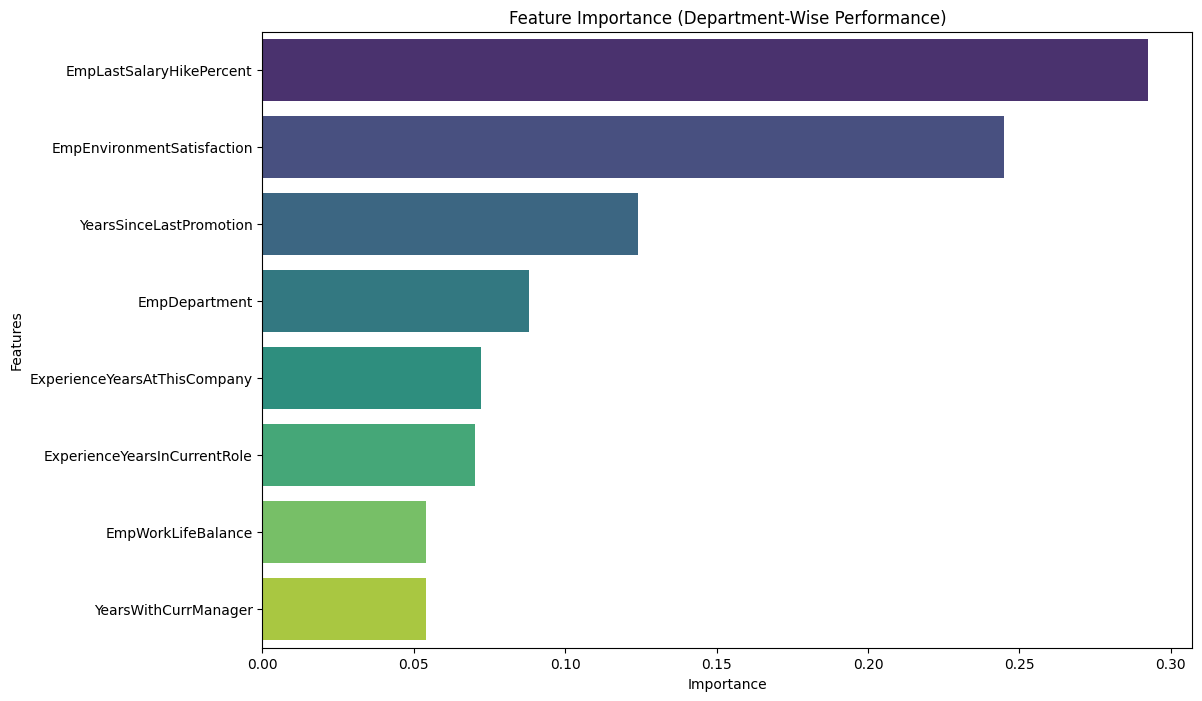

In [26]:
# Visualization of feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances['Importance'], y=feature_importances.index, hue=feature_importances.index, palette='viridis', legend=False)
plt.title('Feature Importance (Department-Wise Performance)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [27]:
# Explanation: The bar plot shows the importance of each selected original feature in predicting employee performance.
# Features with higher importance scores have a stronger influence on the target variable.

In [28]:
# 5. Identify Top 3 Important Factors Affecting Employee Performance
top_factors = feature_importances.head(3)
print("Top 3 Important Factors Affecting Performance:")
print(top_factors)

Top 3 Important Factors Affecting Performance:
                            Importance
EmpLastSalaryHikePercent      0.292494
EmpEnvironmentSatisfaction    0.245047
YearsSinceLastPromotion       0.124133


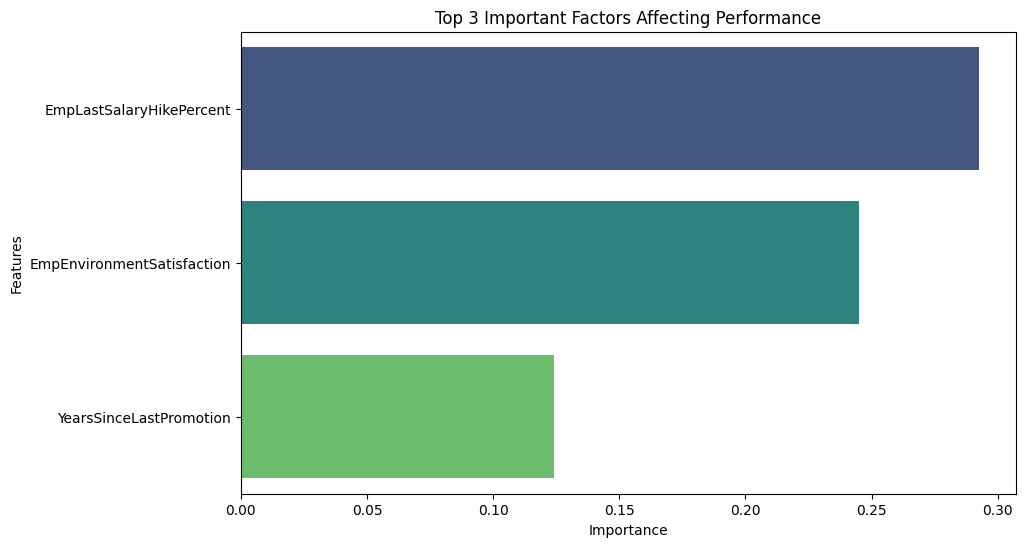

In [29]:
# Visualization of the top 3 important factors
plt.figure(figsize=(10, 6))
sns.barplot(x=top_factors['Importance'], y=top_factors.index, hue=top_factors.index, palette='viridis', legend=False)
plt.title('Top 3 Important Factors Affecting Performance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

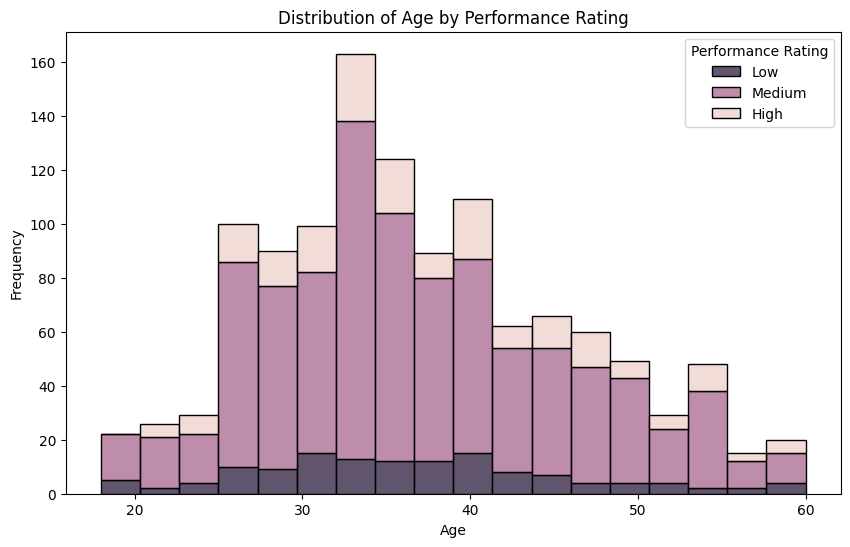


--- Age ---
This plot shows the distribution of the Age across different performance ratings.
**Insight**: Understanding the distribution helps in identifying patterns and trends that could be influencing performance.
**Actionable Insight**: Tailor interventions and strategies based on the specific trends observed in the distribution of each feature.


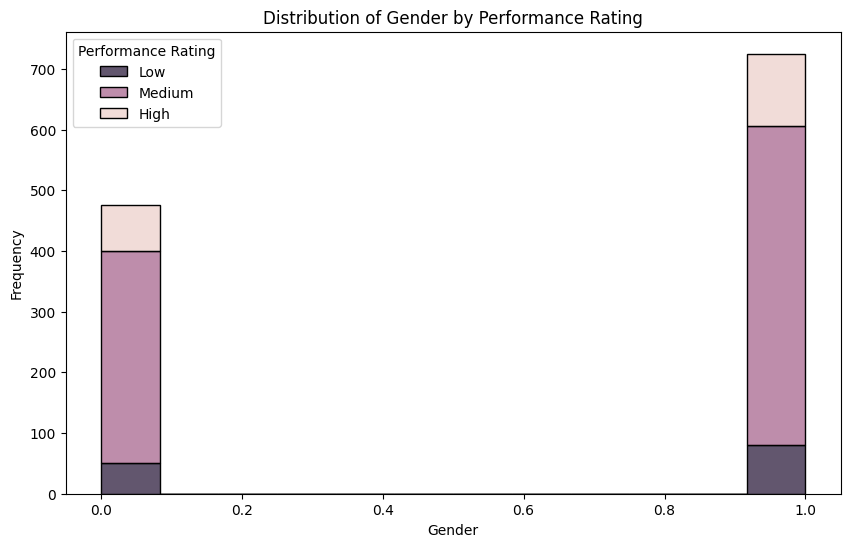


--- Gender ---
This plot shows the distribution of the Gender across different performance ratings.
**Insight**: Understanding the distribution helps in identifying patterns and trends that could be influencing performance.
**Actionable Insight**: Tailor interventions and strategies based on the specific trends observed in the distribution of each feature.


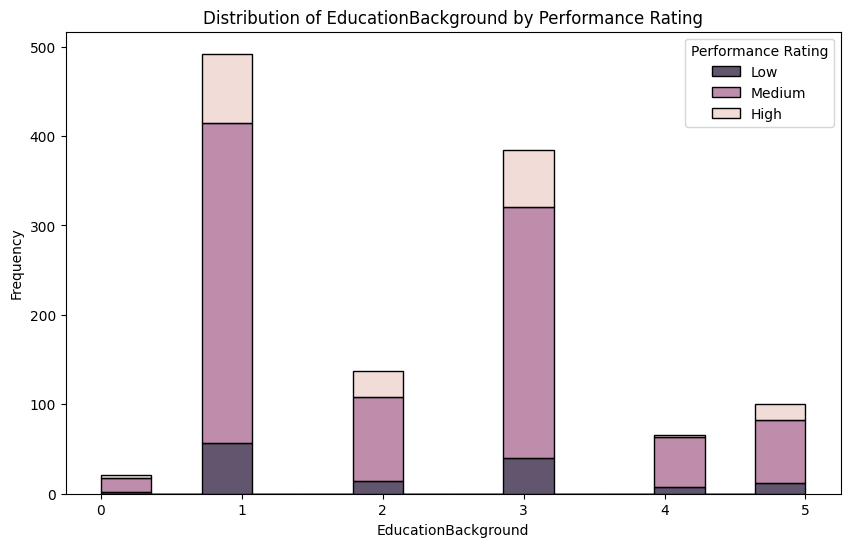


--- EducationBackground ---
This plot shows the distribution of the EducationBackground across different performance ratings.
**Insight**: Understanding the distribution helps in identifying patterns and trends that could be influencing performance.
**Actionable Insight**: Tailor interventions and strategies based on the specific trends observed in the distribution of each feature.


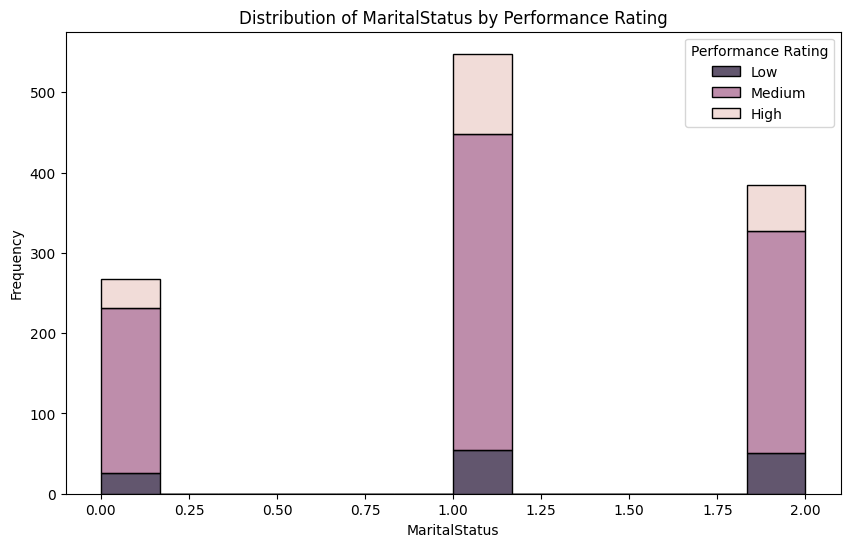


--- MaritalStatus ---
This plot shows the distribution of the MaritalStatus across different performance ratings.
**Insight**: Understanding the distribution helps in identifying patterns and trends that could be influencing performance.
**Actionable Insight**: Tailor interventions and strategies based on the specific trends observed in the distribution of each feature.


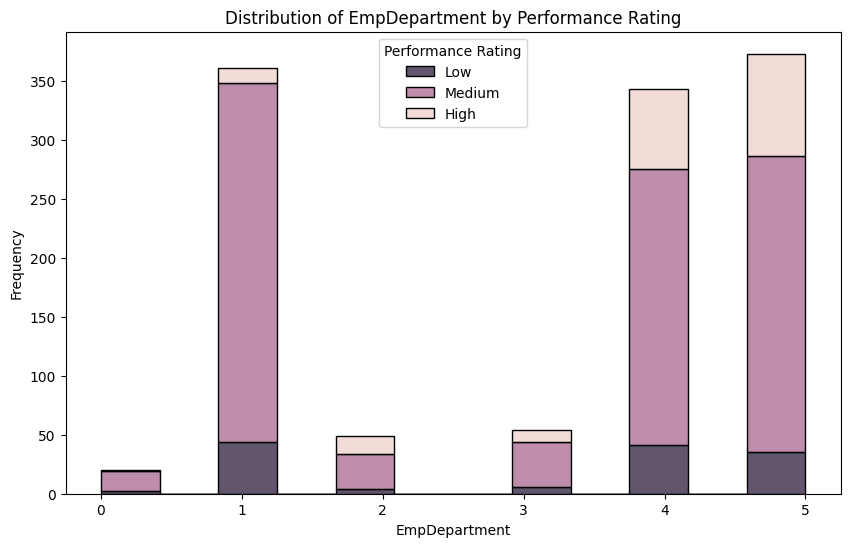


--- EmpDepartment ---
This plot shows the distribution of the EmpDepartment across different performance ratings.
**Insight**: Understanding the distribution helps in identifying patterns and trends that could be influencing performance.
**Actionable Insight**: Tailor interventions and strategies based on the specific trends observed in the distribution of each feature.


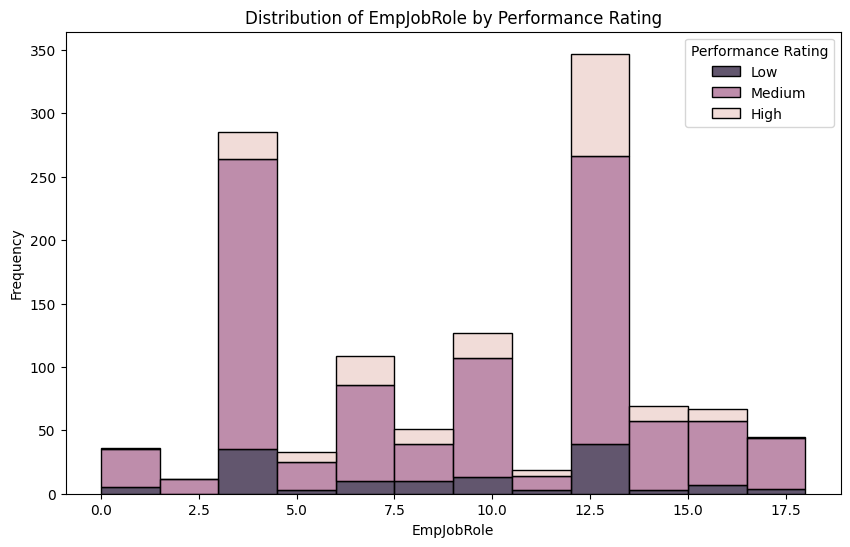


--- EmpJobRole ---
This plot shows the distribution of the EmpJobRole across different performance ratings.
**Insight**: Understanding the distribution helps in identifying patterns and trends that could be influencing performance.
**Actionable Insight**: Tailor interventions and strategies based on the specific trends observed in the distribution of each feature.


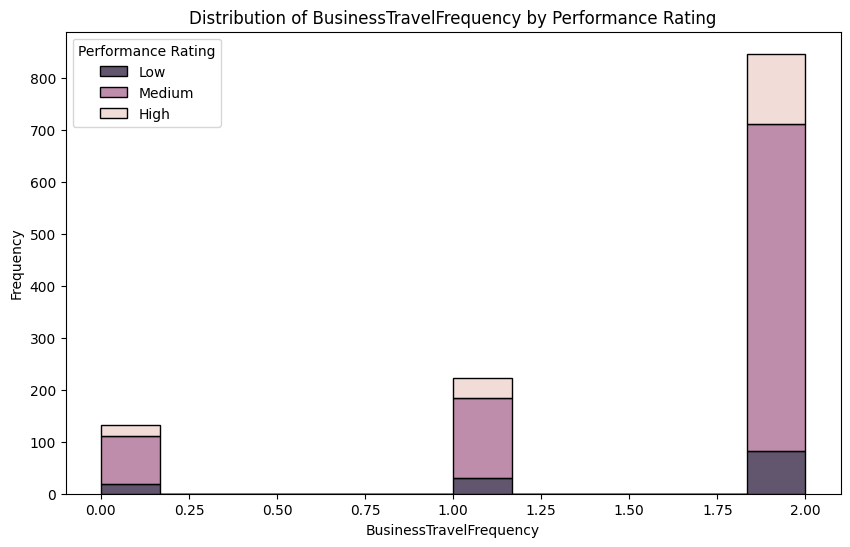


--- BusinessTravelFrequency ---
This plot shows the distribution of the BusinessTravelFrequency across different performance ratings.
**Insight**: Understanding the distribution helps in identifying patterns and trends that could be influencing performance.
**Actionable Insight**: Tailor interventions and strategies based on the specific trends observed in the distribution of each feature.


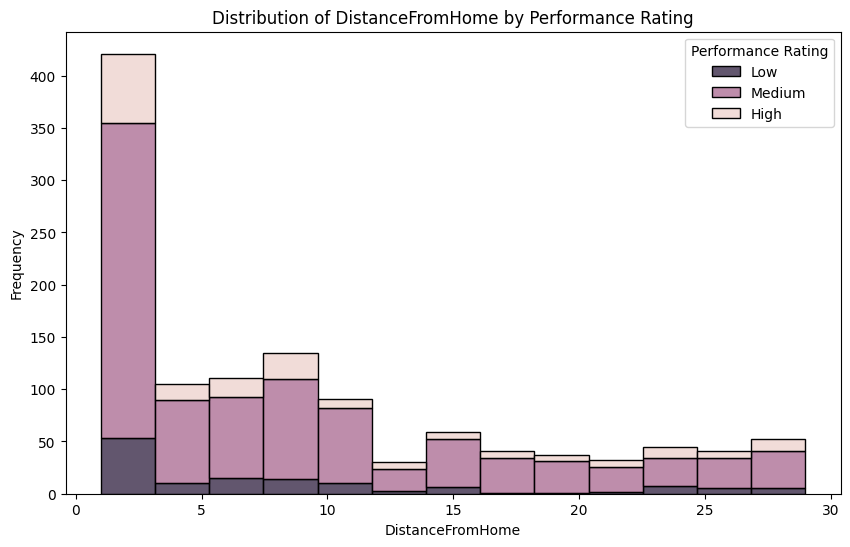


--- DistanceFromHome ---
This plot shows the distribution of the DistanceFromHome across different performance ratings.
**Insight**: Understanding the distribution helps in identifying patterns and trends that could be influencing performance.
**Actionable Insight**: Tailor interventions and strategies based on the specific trends observed in the distribution of each feature.


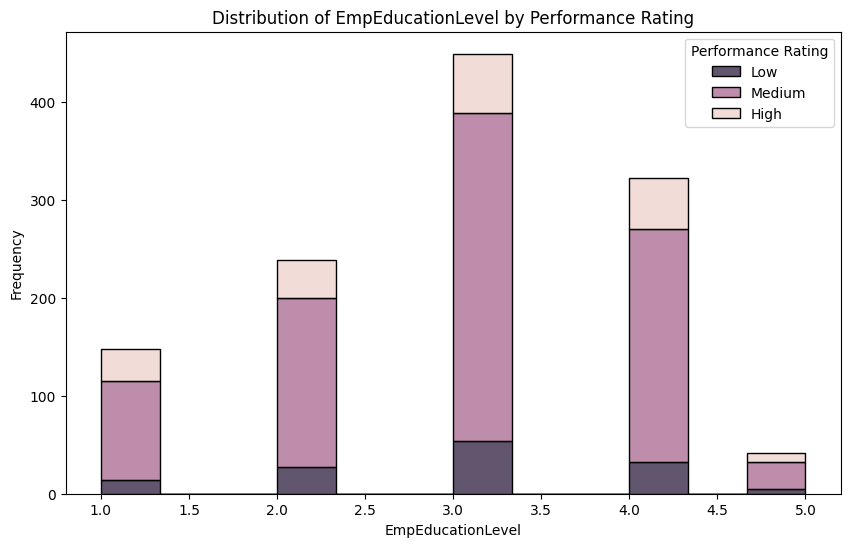


--- EmpEducationLevel ---
This plot shows the distribution of the EmpEducationLevel across different performance ratings.
**Insight**: Understanding the distribution helps in identifying patterns and trends that could be influencing performance.
**Actionable Insight**: Tailor interventions and strategies based on the specific trends observed in the distribution of each feature.


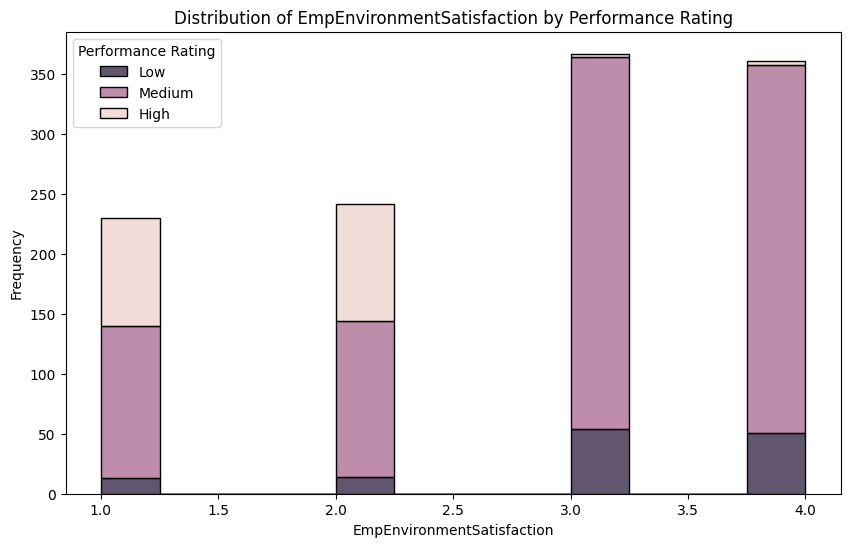


--- EmpEnvironmentSatisfaction ---
This plot shows that higher environment satisfaction scores are associated with higher performance ratings, while lower satisfaction scores are more frequent among lower-performing employees.
**Insight**: This indicates that employees who are more satisfied with their work environment tend to perform better.
**Actionable Insight**: Improve the work environment by addressing areas where employees are dissatisfied. This could involve better facilities, work-life balance initiatives, or workplace culture improvements.


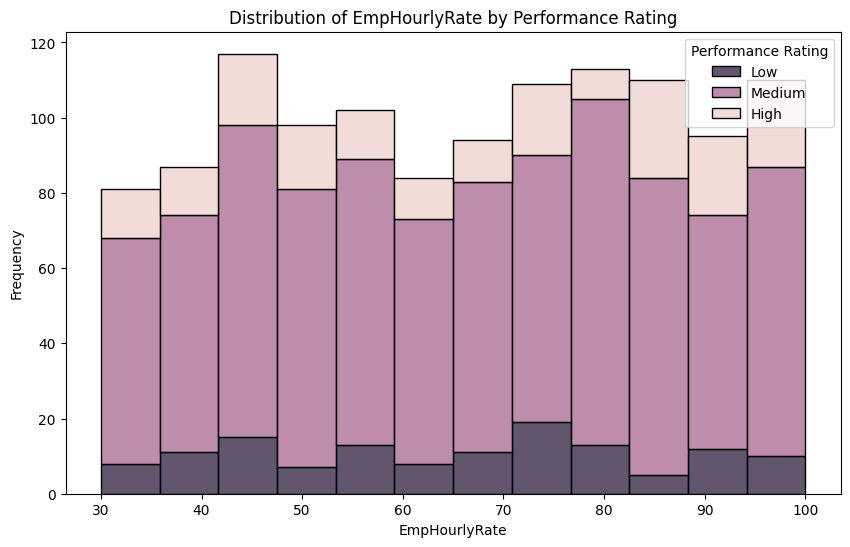


--- EmpHourlyRate ---
This plot shows the distribution of the EmpHourlyRate across different performance ratings.
**Insight**: Understanding the distribution helps in identifying patterns and trends that could be influencing performance.
**Actionable Insight**: Tailor interventions and strategies based on the specific trends observed in the distribution of each feature.


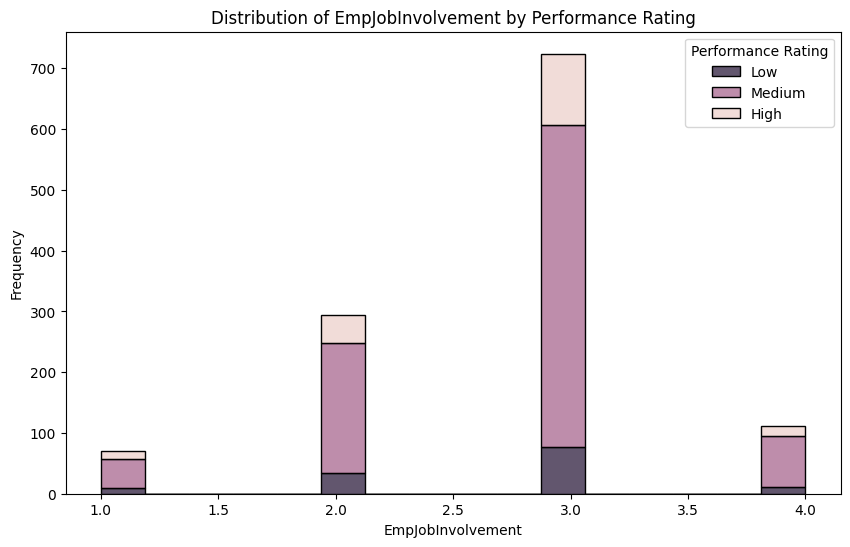


--- EmpJobInvolvement ---
This plot shows the distribution of the EmpJobInvolvement across different performance ratings.
**Insight**: Understanding the distribution helps in identifying patterns and trends that could be influencing performance.
**Actionable Insight**: Tailor interventions and strategies based on the specific trends observed in the distribution of each feature.


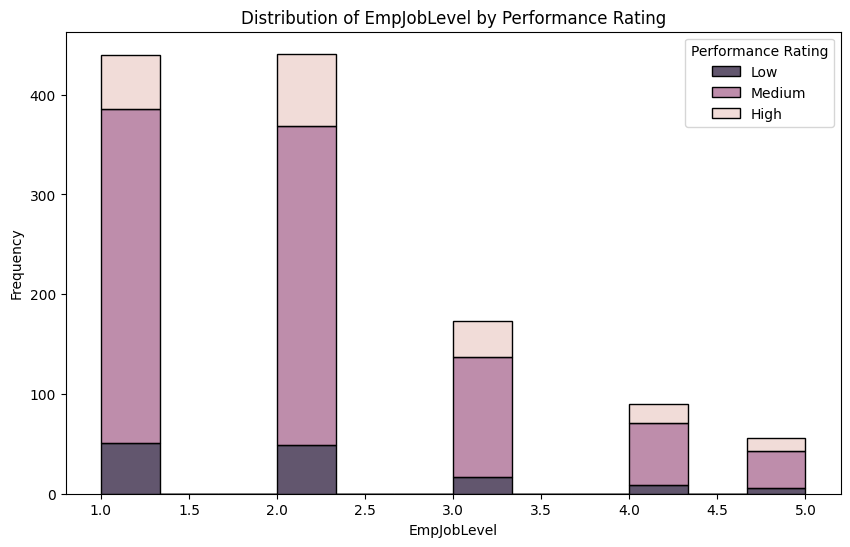


--- EmpJobLevel ---
This plot shows the distribution of the EmpJobLevel across different performance ratings.
**Insight**: Understanding the distribution helps in identifying patterns and trends that could be influencing performance.
**Actionable Insight**: Tailor interventions and strategies based on the specific trends observed in the distribution of each feature.


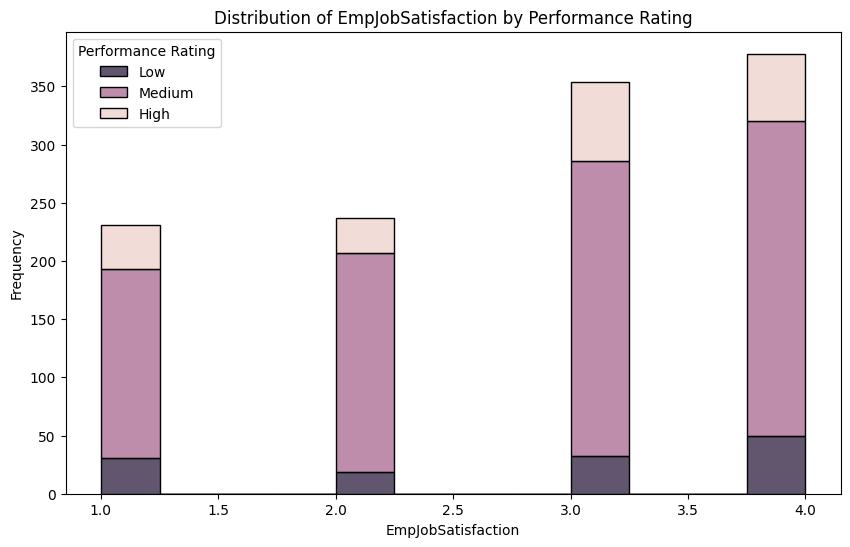


--- EmpJobSatisfaction ---
This plot shows the distribution of the EmpJobSatisfaction across different performance ratings.
**Insight**: Understanding the distribution helps in identifying patterns and trends that could be influencing performance.
**Actionable Insight**: Tailor interventions and strategies based on the specific trends observed in the distribution of each feature.


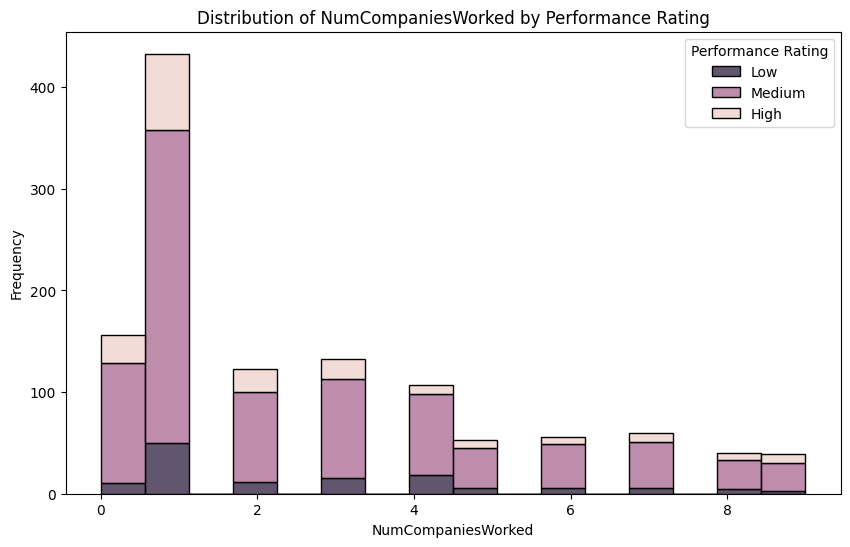


--- NumCompaniesWorked ---
This plot shows the distribution of the NumCompaniesWorked across different performance ratings.
**Insight**: Understanding the distribution helps in identifying patterns and trends that could be influencing performance.
**Actionable Insight**: Tailor interventions and strategies based on the specific trends observed in the distribution of each feature.


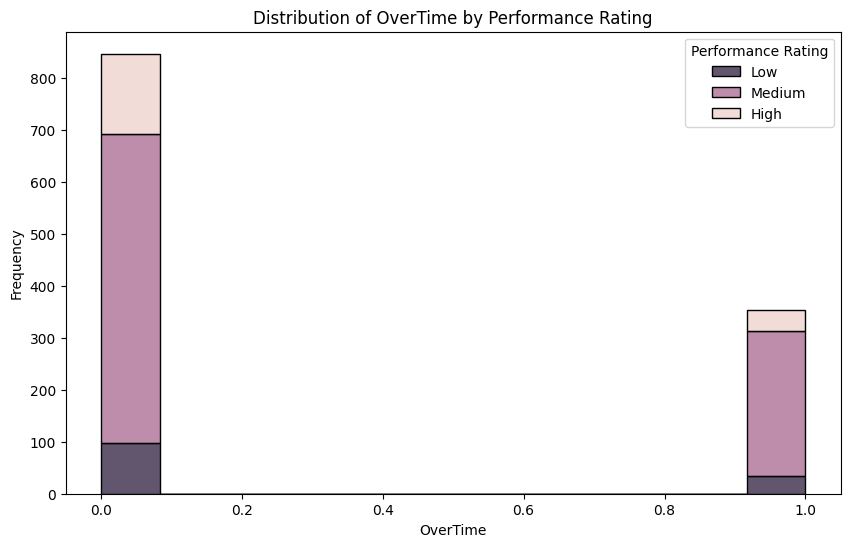


--- OverTime ---
This plot shows the distribution of the OverTime across different performance ratings.
**Insight**: Understanding the distribution helps in identifying patterns and trends that could be influencing performance.
**Actionable Insight**: Tailor interventions and strategies based on the specific trends observed in the distribution of each feature.


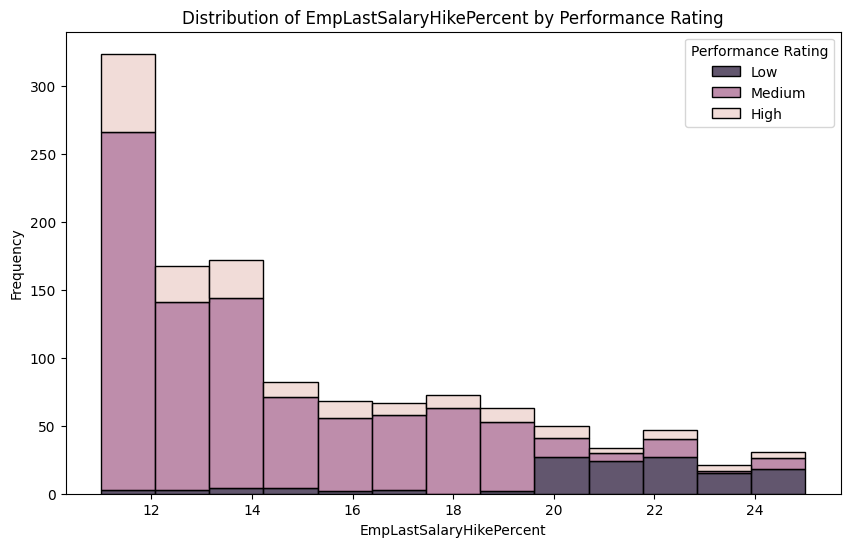


--- EmpLastSalaryHikePercent ---
This plot shows the distribution of the EmpLastSalaryHikePercent across different performance ratings.
**Insight**: Understanding the distribution helps in identifying patterns and trends that could be influencing performance.
**Actionable Insight**: Tailor interventions and strategies based on the specific trends observed in the distribution of each feature.


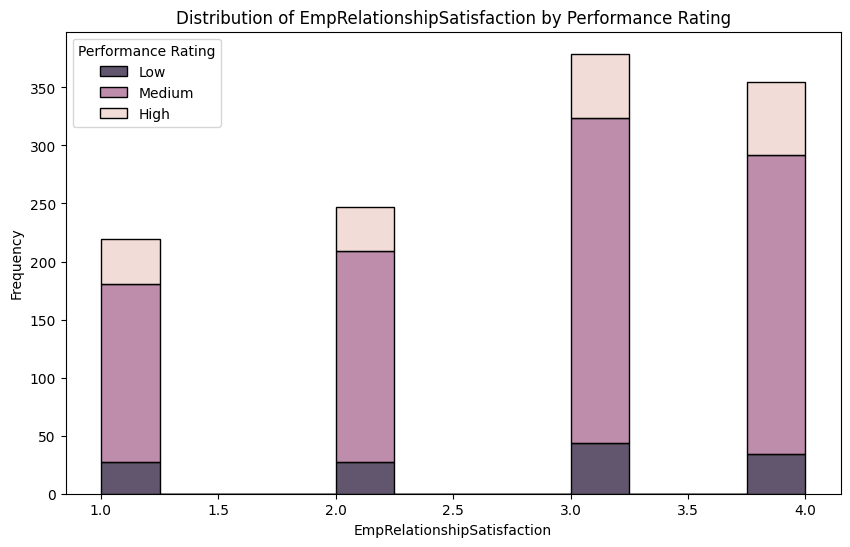


--- EmpRelationshipSatisfaction ---
This plot shows the distribution of the EmpRelationshipSatisfaction across different performance ratings.
**Insight**: Understanding the distribution helps in identifying patterns and trends that could be influencing performance.
**Actionable Insight**: Tailor interventions and strategies based on the specific trends observed in the distribution of each feature.


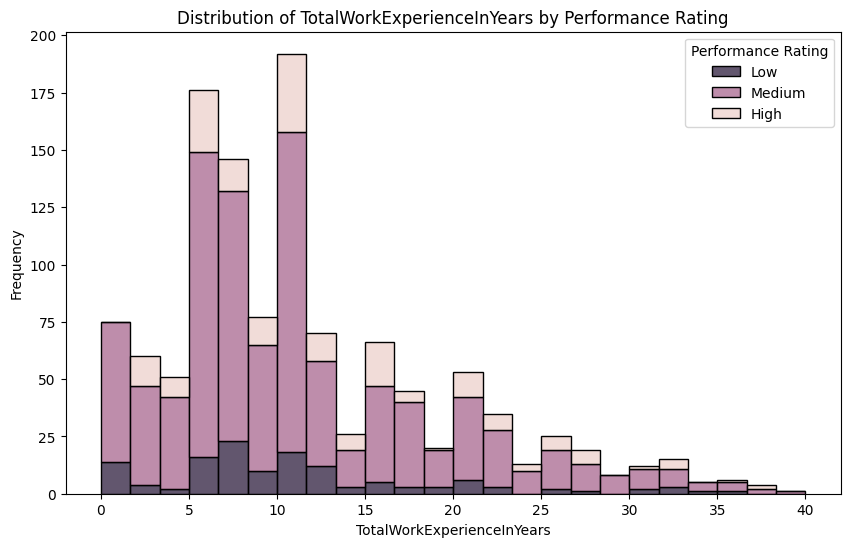


--- TotalWorkExperienceInYears ---
This plot shows the distribution of the TotalWorkExperienceInYears across different performance ratings.
**Insight**: Understanding the distribution helps in identifying patterns and trends that could be influencing performance.
**Actionable Insight**: Tailor interventions and strategies based on the specific trends observed in the distribution of each feature.


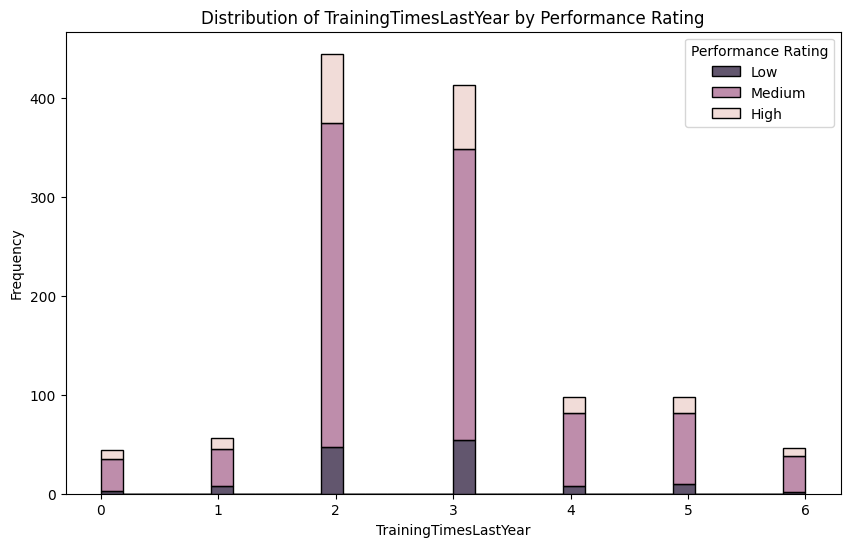


--- TrainingTimesLastYear ---
This plot shows the distribution of the TrainingTimesLastYear across different performance ratings.
**Insight**: Understanding the distribution helps in identifying patterns and trends that could be influencing performance.
**Actionable Insight**: Tailor interventions and strategies based on the specific trends observed in the distribution of each feature.


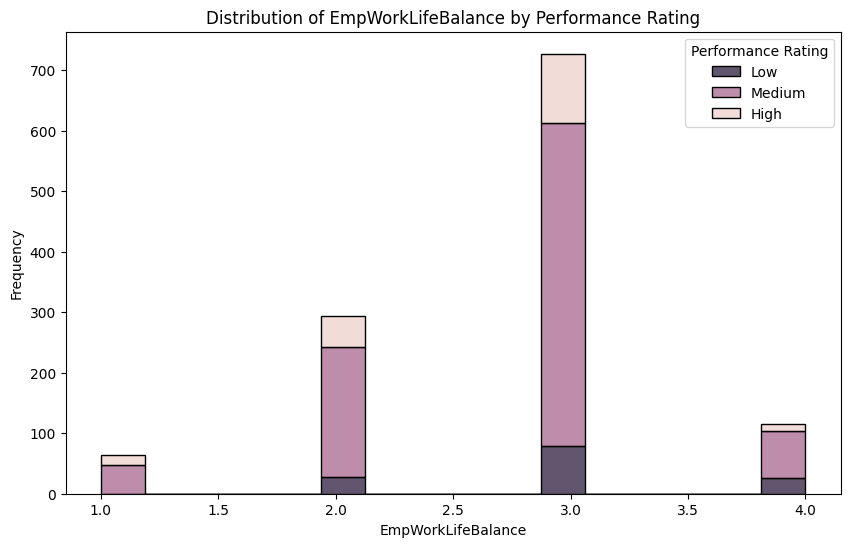


--- EmpWorkLifeBalance ---
This plot reveals that employees who report a better work-life balance (higher scores) are more likely to have higher performance ratings.
**Insight**: A good work-life balance might contribute positively to employee performance.
**Actionable Insight**: Consider implementing policies that support work-life balance, such as flexible working hours, remote work options, or wellness programs.


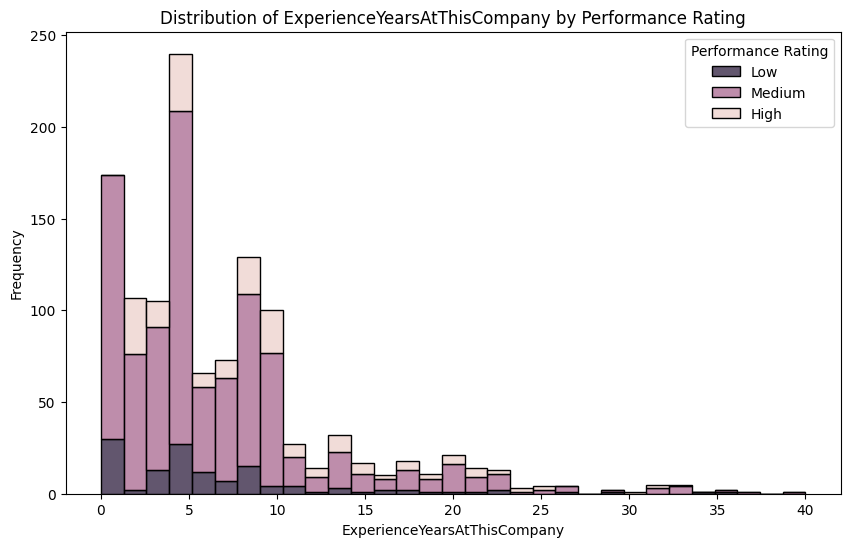


--- ExperienceYearsAtThisCompany ---
This plot shows the distribution of the ExperienceYearsAtThisCompany across different performance ratings.
**Insight**: Understanding the distribution helps in identifying patterns and trends that could be influencing performance.
**Actionable Insight**: Tailor interventions and strategies based on the specific trends observed in the distribution of each feature.


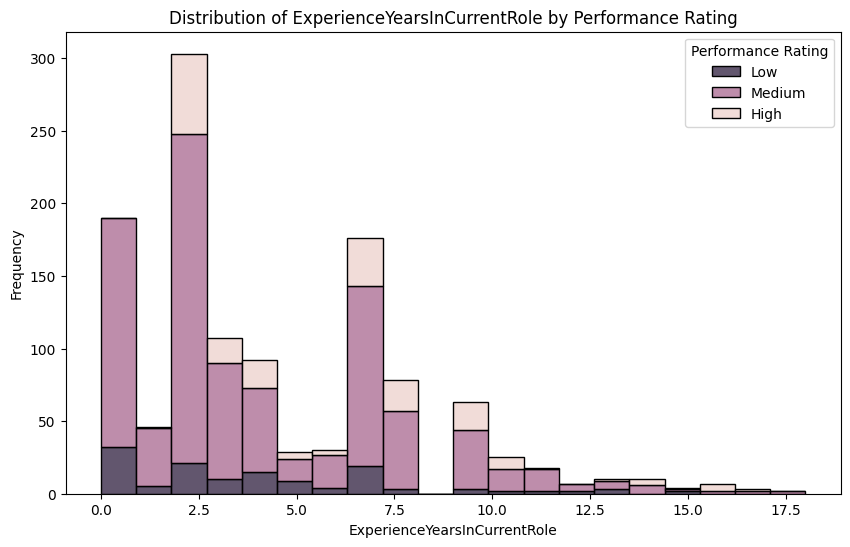


--- ExperienceYearsInCurrentRole ---
This plot shows that employees with a moderate amount of experience in their current role have the highest performance ratings, while both very new and very experienced employees show a wider range of performance ratings.
**Insight**: Employees may reach an optimal performance level after gaining a few years of experience in their role, but performance may plateau or vary more widely with either too little or too much time in the same role.
**Actionable Insight**: Consider providing continuous learning and development opportunities, especially for those who have been in the same role for many years, to keep their skills sharp and their motivation high.


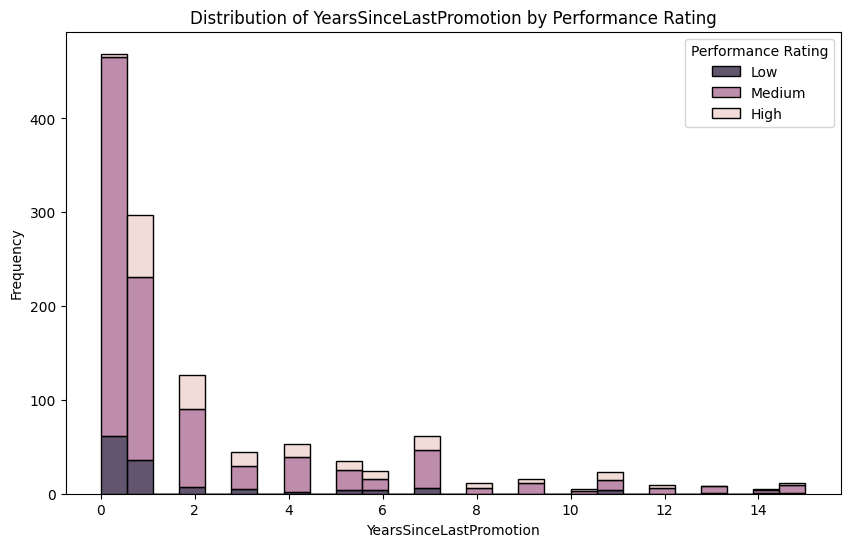


--- YearsSinceLastPromotion ---
This plot shows that employees with fewer years since their last promotion tend to have higher performance ratings, while those with more years since their last promotion are more likely to have lower performance ratings.
**Insight**: This suggests that employees who are promoted more recently tend to perform better, possibly due to increased motivation or new responsibilities.
**Actionable Insight**: Consider implementing regular promotion cycles or other motivational strategies to maintain high performance.


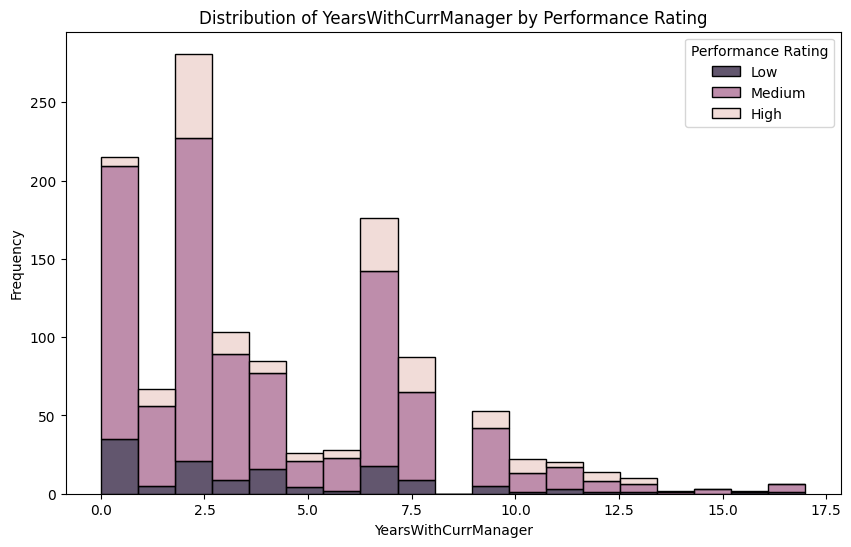


--- YearsWithCurrManager ---
This plot shows the distribution of the YearsWithCurrManager across different performance ratings.
**Insight**: Understanding the distribution helps in identifying patterns and trends that could be influencing performance.
**Actionable Insight**: Tailor interventions and strategies based on the specific trends observed in the distribution of each feature.


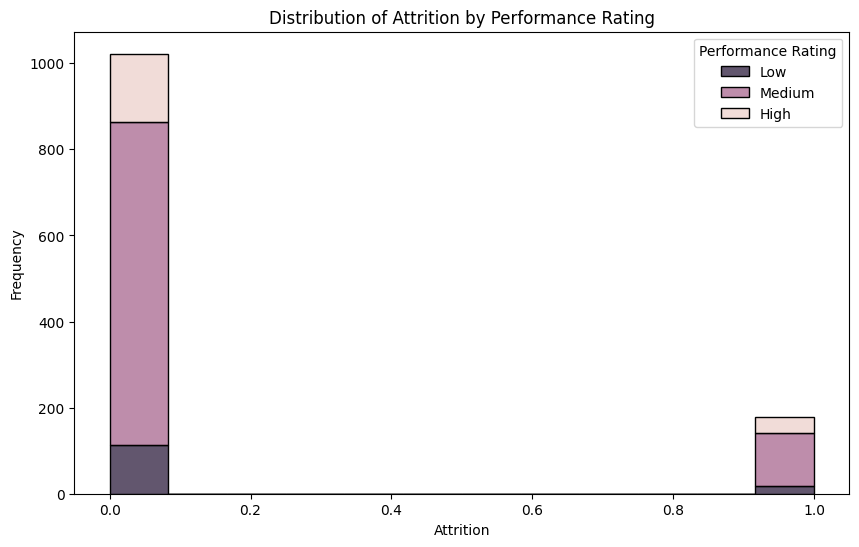


--- Attrition ---
This plot shows the distribution of the Attrition across different performance ratings.
**Insight**: Understanding the distribution helps in identifying patterns and trends that could be influencing performance.
**Actionable Insight**: Tailor interventions and strategies based on the specific trends observed in the distribution of each feature.


In [30]:
# 2. Department-Wise Performance Analysis (Here, department refers to individual features)
for feature in X.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=feature, hue='PerformanceRating', multiple='stack')
    plt.title(f'Distribution of {feature} by Performance Rating')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    
    # Manually add the legend labels, without using handles
    plt.legend(labels=['Low', 'Medium', 'High'], title='Performance Rating')
    
    plt.show()
    
    # Explanation and Insights for Each Feature
    if feature == 'YearsSinceLastPromotion':
        print("\n--- YearsSinceLastPromotion ---")
        print("This plot shows that employees with fewer years since their last promotion tend to have higher performance ratings, while those with more years since their last promotion are more likely to have lower performance ratings.")
        print("**Insight**: This suggests that employees who are promoted more recently tend to perform better, possibly due to increased motivation or new responsibilities.")
        print("**Actionable Insight**: Consider implementing regular promotion cycles or other motivational strategies to maintain high performance.")
    elif feature == 'EmpEnvironmentSatisfaction':
        print("\n--- EmpEnvironmentSatisfaction ---")
        print("This plot shows that higher environment satisfaction scores are associated with higher performance ratings, while lower satisfaction scores are more frequent among lower-performing employees.")
        print("**Insight**: This indicates that employees who are more satisfied with their work environment tend to perform better.")
        print("**Actionable Insight**: Improve the work environment by addressing areas where employees are dissatisfied. This could involve better facilities, work-life balance initiatives, or workplace culture improvements.")
    elif feature == 'EmpWorkLifeBalance':
        print("\n--- EmpWorkLifeBalance ---")
        print("This plot reveals that employees who report a better work-life balance (higher scores) are more likely to have higher performance ratings.")
        print("**Insight**: A good work-life balance might contribute positively to employee performance.")
        print("**Actionable Insight**: Consider implementing policies that support work-life balance, such as flexible working hours, remote work options, or wellness programs.")
    elif feature == 'ExperienceYearsInCurrentRole':
        print("\n--- ExperienceYearsInCurrentRole ---")
        print("This plot shows that employees with a moderate amount of experience in their current role have the highest performance ratings, while both very new and very experienced employees show a wider range of performance ratings.")
        print("**Insight**: Employees may reach an optimal performance level after gaining a few years of experience in their role, but performance may plateau or vary more widely with either too little or too much time in the same role.")
        print("**Actionable Insight**: Consider providing continuous learning and development opportunities, especially for those who have been in the same role for many years, to keep their skills sharp and their motivation high.")
    else:
        print(f"\n--- {feature} ---")
        print(f"This plot shows the distribution of the {feature} across different performance ratings.")
        print("**Insight**: Understanding the distribution helps in identifying patterns and trends that could be influencing performance.")
        print("**Actionable Insight**: Tailor interventions and strategies based on the specific trends observed in the distribution of each feature.")


In [31]:
# 6. Train and Compare Multiple ML Models

# Train-test split using the selected original features from SelectKBest
X_train, X_test, y_train, y_test = train_test_split(X_selected_original, y, test_size=0.2, random_state=42)


In [32]:
# Define models to evaluate
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(random_state=42, multi_class='ovr', solver='lbfgs') # Specify multi_class strategy
}

Random Forest - Accuracy: 0.94, AUC: 0.95, F1 Score: 0.94


d:\Datamites CDS1 Project\Employee-Performance-Analysis\venv\lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
d:\Datamites CDS1 Project\Employee-Performance-Analysis\venv\lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\rbhar\AppData\Local\Temp\ipykernel_28580\1723774083.py:59: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="lower right")


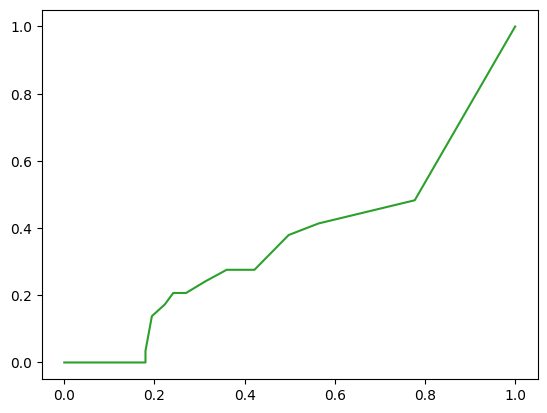

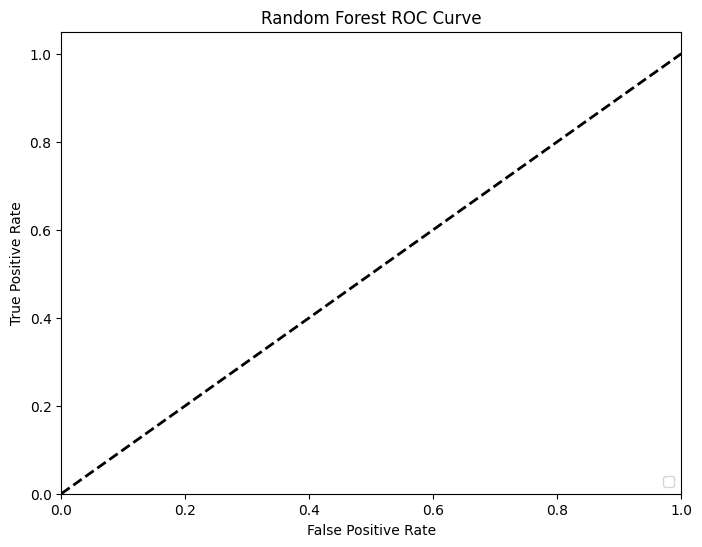

SVM - Accuracy: 0.88, AUC: 0.94, F1 Score: 0.88


d:\Datamites CDS1 Project\Employee-Performance-Analysis\venv\lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
d:\Datamites CDS1 Project\Employee-Performance-Analysis\venv\lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\rbhar\AppData\Local\Temp\ipykernel_28580\1723774083.py:59: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="lower right")


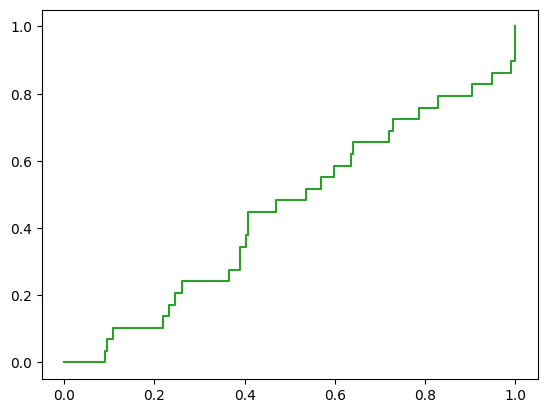

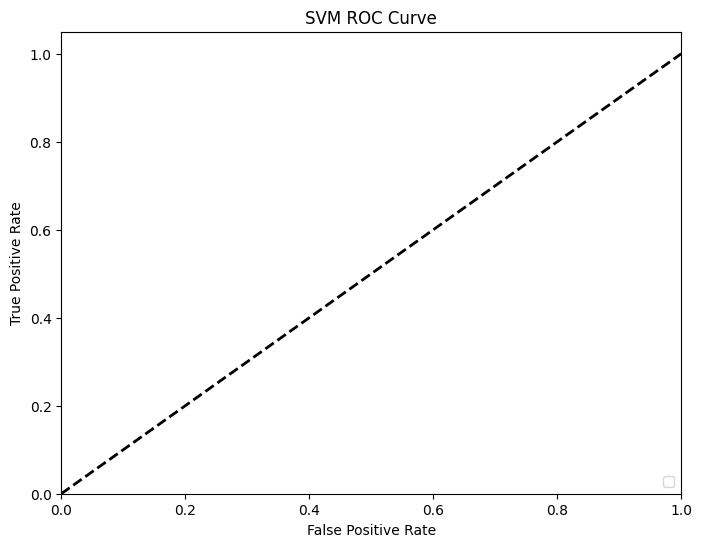

Gradient Boosting - Accuracy: 0.93, AUC: 0.96, F1 Score: 0.93


d:\Datamites CDS1 Project\Employee-Performance-Analysis\venv\lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
d:\Datamites CDS1 Project\Employee-Performance-Analysis\venv\lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\rbhar\AppData\Local\Temp\ipykernel_28580\1723774083.py:59: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="lower right")


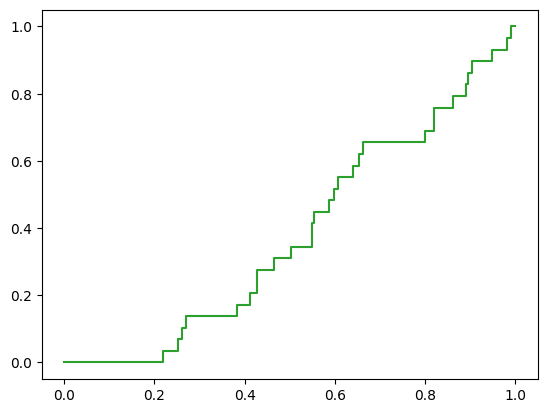

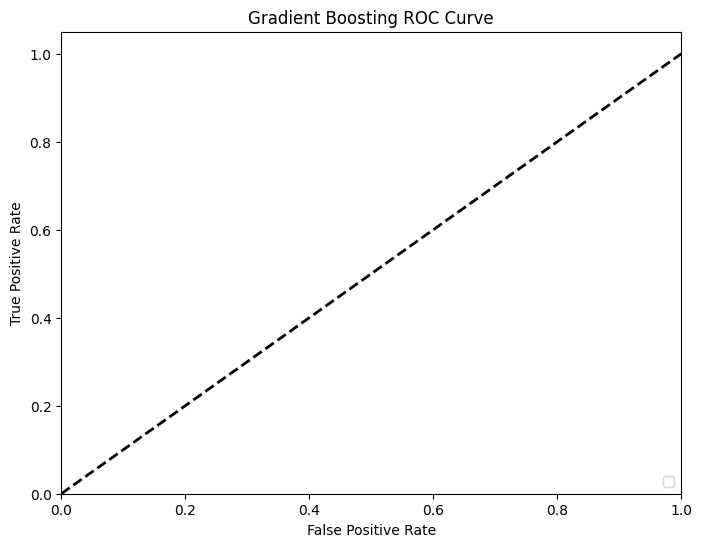

KNN - Accuracy: 0.84, AUC: 0.86, F1 Score: 0.84


d:\Datamites CDS1 Project\Employee-Performance-Analysis\venv\lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
d:\Datamites CDS1 Project\Employee-Performance-Analysis\venv\lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\rbhar\AppData\Local\Temp\ipykernel_28580\1723774083.py:59: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="lower right")


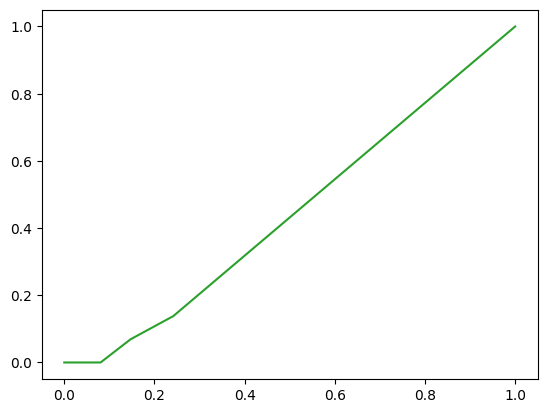

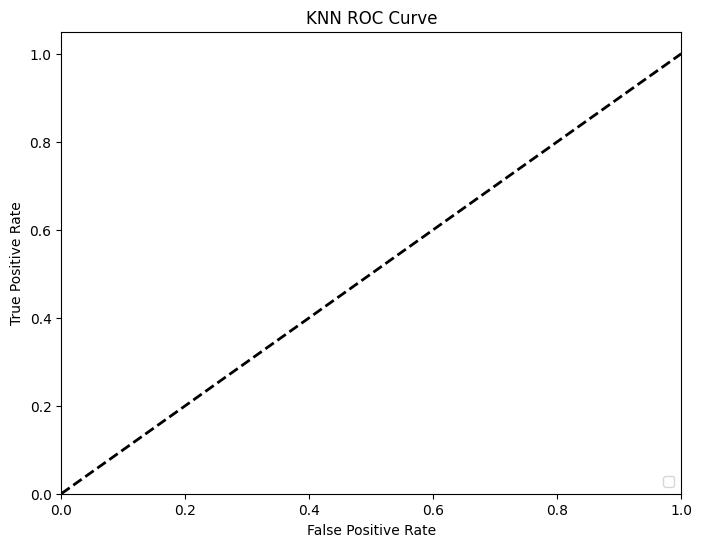

Logistic Regression - Accuracy: 0.82, AUC: 0.90, F1 Score: 0.82


d:\Datamites CDS1 Project\Employee-Performance-Analysis\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\Datamites CDS1 Project\Employee-Performance-Analysis\venv\lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
d:\Datamites CDS1 Project\Employee-Performance-Analysis\venv\lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\rbhar\AppData\Local\Temp\ipykernel_28580\1723774083.py:59: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is 

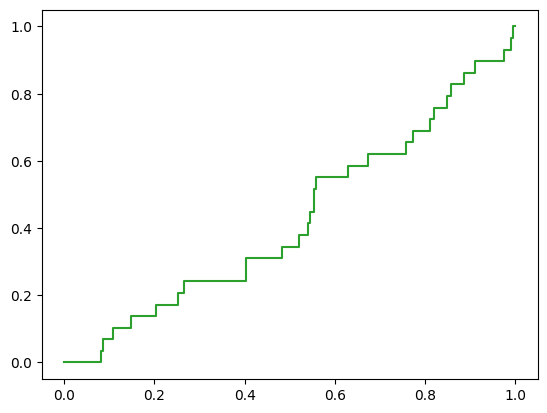

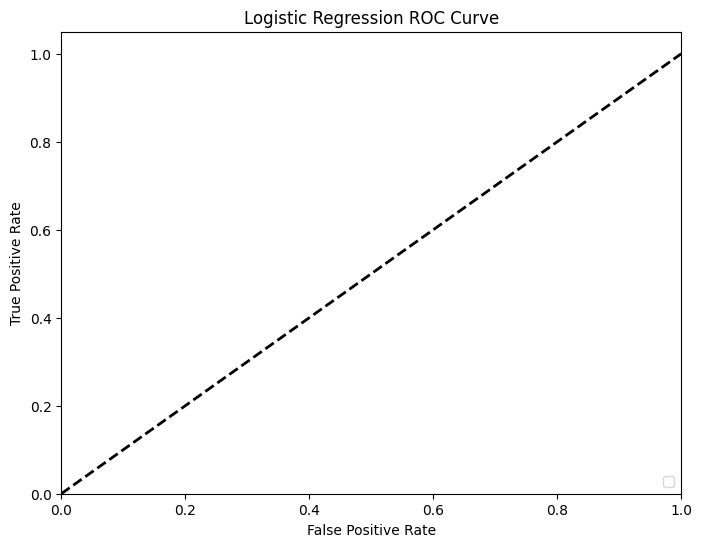

In [33]:
# Containers to hold performance metrics
model_names = []
accuracies = []
roc_aucs = []
f1_scores = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Get predictions and probabilities
    y_pred = model.predict(X_test)
    
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)
        if y_prob.ndim == 2 and y_prob.shape[1] > 1:  # Binary or multi-class with more than one probability column
            y_prob = y_prob[:, 1] if len(np.unique(y)) == 2 else y_prob
        else:
            y_prob = y_prob.ravel()  # If it's a single column or a 1D array
    else:
        y_prob = model.decision_function(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    
    # Handle binary vs multi-class
    if len(np.unique(y)) > 2:
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
    else:
        roc_auc = roc_auc_score(y_test, y_prob)
    
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Store results
    model_names.append(name)
    accuracies.append(accuracy)
    roc_aucs.append(roc_auc)
    f1_scores.append(f1)

    # Print the results for this model
    print(f"{name} - Accuracy: {accuracy:.2f}, AUC: {roc_auc:.2f}, F1 Score: {f1:.2f}")

    # Plot AUC-ROC curve
    if len(np.unique(y)) > 2:
        for i in range(len(np.unique(y))):
            fpr, tpr, _ = roc_curve(y_test == i, y_prob[:, i] if y_prob.ndim == 2 else y_prob)
            plt.plot(fpr, tpr, label=f'{name} class {i} (AUC = {roc_auc:.2f})')
    else:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    plt.figure(figsize=(8, 6))
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [45]:
# 7. Deep Learning Model (Neural Network)
# Adjust for multi-class: Use softmax activation if it's a multi-class problem
# Determine the number of unique classes in the target variable
output_units = len(np.unique(y))
print(f"Number of classes: {output_units}")
print(f"Unique classes in y: {np.unique(y)}")

Number of classes: 3
Unique classes in y: [2 3 4]


In [46]:
# Adjust class labels to start from 0 if necessary
y_train_adjusted = y_train - y_train.min()
y_test_adjusted = y_test - y_test.min()

In [47]:
# Recheck unique classes after adjustment
print(f"Unique classes in y_train_adjusted: {np.unique(y_train_adjusted)}")
print(f"Unique classes in y_test_adjusted: {np.unique(y_test_adjusted)}")

Unique classes in y_train_adjusted: [0 1 2]
Unique classes in y_test_adjusted: [0 1 2]


In [48]:
# Adjust for multi-class: Use softmax activation if it's a multi-class problem
activation = 'softmax' if output_units > 2 else 'sigmoid'
loss = 'categorical_crossentropy' if output_units > 2 else 'binary_crossentropy'

In [49]:
# Define the model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(output_units, activation=activation))

model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

d:\Datamites CDS1 Project\Employee-Performance-Analysis\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [58]:
# Manual One-Hot Encoding with Adjusted Labels
y_train_oh, y_test_oh = None, None  # Initialize variables
if output_units > 2:
    y_train_oh = tf.keras.utils.to_categorical(y_train_adjusted, num_classes=output_units)
    y_test_oh = tf.keras.utils.to_categorical(y_test_adjusted, num_classes=output_units)
    print(f"Shape of y_train_oh after one-hot encoding: {y_train_oh.shape}")
    print(f"Shape of y_test_oh after one-hot encoding: {y_test_oh.shape}")

    # Train the model
    history = model.fit(X_train, y_train_oh, validation_data=(X_test, y_test_oh), epochs=20, batch_size=32, verbose=1)
else:
    history = model.fit(X_train, y_train_adjusted, validation_data=(X_test, y_test_adjusted), epochs=20, batch_size=32, verbose=1)

Shape of y_train_oh after one-hot encoding: (960, 3)
Shape of y_test_oh after one-hot encoding: (240, 3)
Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4694 - loss: 1.0284 - val_accuracy: 0.7750 - val_loss: 0.7492
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7382 - loss: 0.7585 - val_accuracy: 0.7917 - val_loss: 0.5768
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7111 - loss: 0.6868 - val_accuracy: 0.8042 - val_loss: 0.4991
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7340 - loss: 0.6301 - val_accuracy: 0.8125 - val_loss: 0.4559
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7605 - loss: 0.5569 - val_accuracy: 0.8167 - val_loss: 0.4302
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7777 - loss: 0.5317 - val_accuracy: 0.8208 - val_loss: 0.4025
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7763 - loss: 0.4891 - val_accuracy: 0.8125 - val_loss: 0.3971
Epoch 8/20
30

In [59]:
# Evaluate the model
if output_units > 2:
    y_prob_nn = model.predict(X_test)
    print(f"Shape of y_prob_nn (model predictions): {y_prob_nn.shape}")
    roc_auc_nn = roc_auc_score(y_test_oh, y_prob_nn, multi_class='ovr')
    y_pred_nn = np.argmax(y_prob_nn, axis=1)
else:
    y_prob_nn = model.predict(X_test).ravel()
    print(f"Shape of y_prob_nn (model predictions): {y_prob_nn.shape}")
    roc_auc_nn = roc_auc_score(y_test_adjusted, y_prob_nn)
    y_pred_nn = (y_prob_nn > 0.5).astype(int)

accuracy_nn = accuracy_score(y_test_adjusted, y_pred_nn)
f1_nn = f1_score(y_test_adjusted, y_pred_nn, average='weighted')

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step
Shape of y_prob_nn (model predictions): (240, 3)


In [60]:
# Print neural network results
print(f"Neural Network - Accuracy: {accuracy_nn:.2f}, AUC: {roc_auc_nn:.2f}, F1 Score: {f1_nn:.2f}")

Neural Network - Accuracy: 0.85, AUC: 0.94, F1 Score: 0.85


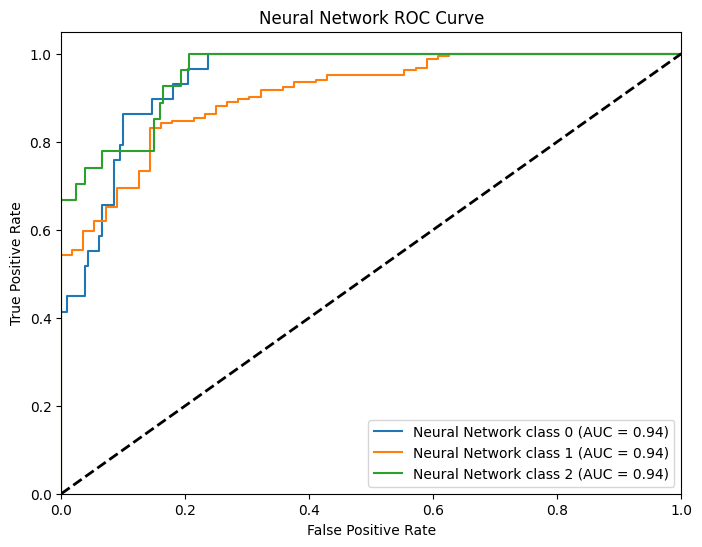

In [61]:
# Plot AUC-ROC curve for Neural Network
plt.figure(figsize=(8, 6))
if output_units > 2:
    for i in range(output_units):
        fpr_nn, tpr_nn, _ = roc_curve(y_test_oh[:, i], y_prob_nn[:, i])
        plt.plot(fpr_nn, tpr_nn, label=f'Neural Network class {i} (AUC = {roc_auc_nn:.2f})')
else:
    fpr_nn, tpr_nn, _ = roc_curve(y_test_adjusted, y_prob_nn)
    plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {roc_auc_nn:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Neural Network ROC Curve')
plt.legend(loc="lower right")
plt.show()

C:\Users\rbhar\AppData\Local\Temp\ipykernel_28580\2145966840.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=performance_df, palette='viridis')


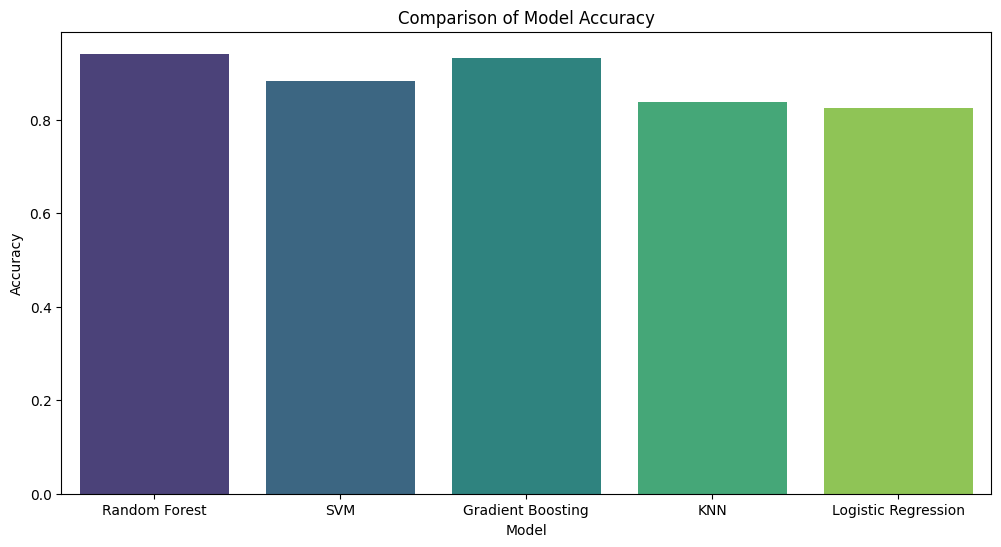

C:\Users\rbhar\AppData\Local\Temp\ipykernel_28580\2145966840.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='AUC', data=performance_df, palette='viridis')


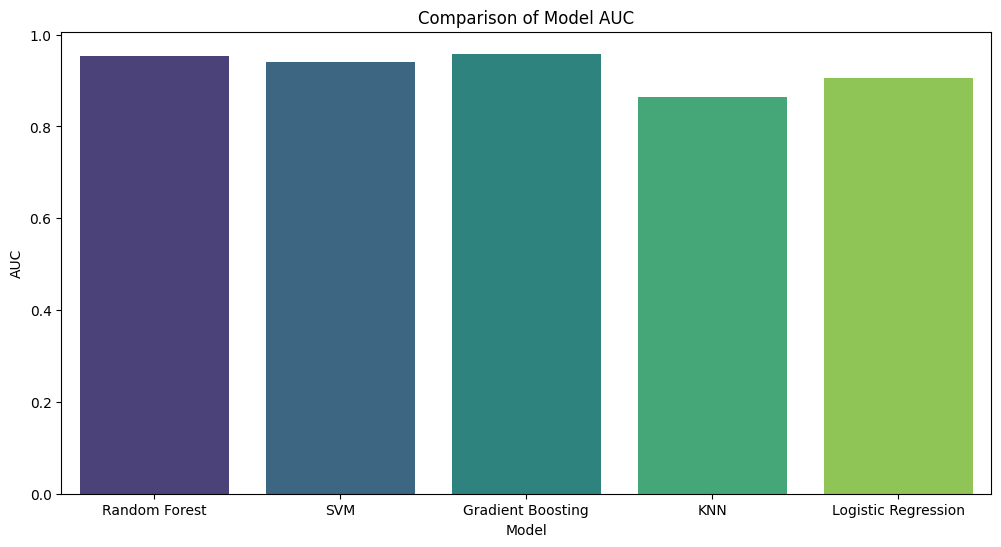

C:\Users\rbhar\AppData\Local\Temp\ipykernel_28580\2145966840.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='F1 Score', data=performance_df, palette='viridis')


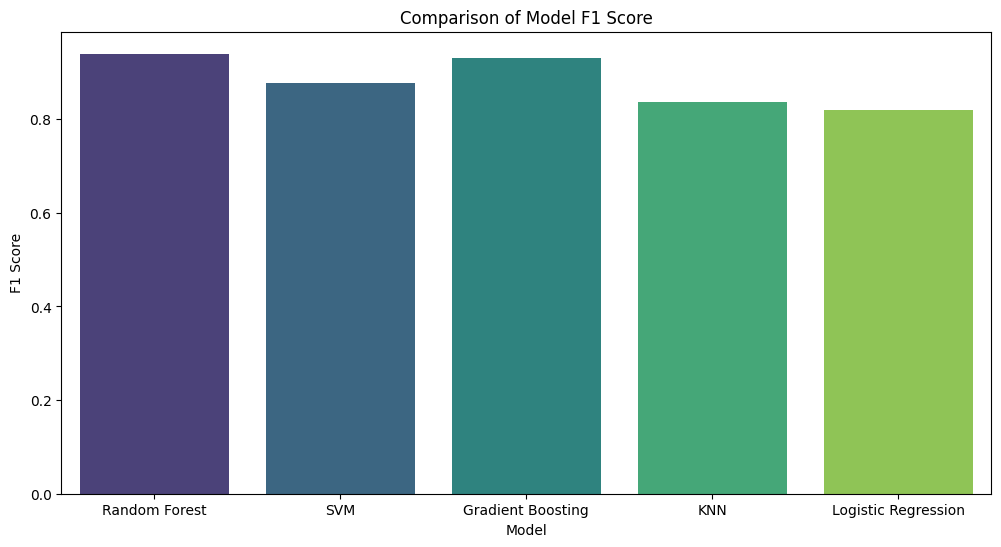

                 Model  Accuracy       AUC  F1 Score
0        Random Forest  0.941667  0.953925  0.940039
1                  SVM  0.883333  0.940172  0.877067
2    Gradient Boosting  0.933333  0.958389  0.931530
3                  KNN  0.837500  0.864564  0.837552
4  Logistic Regression  0.825000  0.904529  0.819324


In [62]:
# Summary Comparison of Model Performance
performance_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'AUC': roc_aucs,
    'F1 Score': f1_scores
})

# Plotting the comparison of models
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Accuracy', data=performance_df, palette='viridis')
plt.title('Comparison of Model Accuracy')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='AUC', data=performance_df, palette='viridis')
plt.title('Comparison of Model AUC')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='F1 Score', data=performance_df, palette='viridis')
plt.title('Comparison of Model F1 Score')
plt.show()

# Display the performance dataframe
print(performance_df)

# All Department wise performance is shown in the graph above.

# The top 3 performers are **"EmpLastSalaryHikePercent"**, **"EmpEnvironmentSatisfaction"**, **"YearsSinceLastPromotion"** 
# A trained model which can predict the employee performance based on factors as inputs. This will be used to hire employees is **"Random Forest model"**
# Recommendations to improve the employee performance based on insights from analysis: All other attributes have to be taken care and the employees need more of these top 3 inputs and then a hike in their performance can be seen.
